In [1]:
import os
import cv2
import numpy as np
import matplotlib
import tensorflow as tf
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [2]:
img_size = 32  
data = "./train"  


In [3]:
def load_images_from_folder(folder_path):
    X, y = [], []
    label_map = {}
    label_num = 0

    for label_folder in sorted(os.listdir(folder_path)):
        path = os.path.join(folder_path, label_folder)
        if not os.path.isdir(path):
            continue
        
        if label_folder not in label_map:
            label_map[label_folder] = label_num
            label_num += 1
        
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
                img = cv2.resize(img, (img_size, img_size))       
                X.append(img)
                y.append(label_map[label_folder])
            except:
                print("Error loading:", img_path)

    return np.array(X), np.array(y), label_map


In [8]:
X, y, label_map = load_images_from_folder(data)


X = X.reshape(-1, img_size, img_size, 1) / 255.0
y = to_categorical(y)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Number of classes:", len(label_map))


X_train shape: (62560, 32, 32, 1)
y_train shape: (62560, 46)
Number of classes: 46


In [14]:
model = Sequential([
    Input(shape=(32, 32, 1)),  

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(46, activation='softmax')  
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)


Epoch 1/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.4430 - loss: 2.0565 - val_accuracy: 0.9079 - val_loss: 0.3330
Epoch 2/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8146 - loss: 0.6049 - val_accuracy: 0.9465 - val_loss: 0.1978
Epoch 3/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8670 - loss: 0.4241 - val_accuracy: 0.9586 - val_loss: 0.1432
Epoch 4/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8966 - loss: 0.3298 - val_accuracy: 0.9648 - val_loss: 0.1230
Epoch 5/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9140 - loss: 0.2734 - val_accuracy: 0.9671 - val_loss: 0.1100
Epoch 6/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9244 - loss: 0.2372 - val_accuracy: 0.9701 - val_loss: 0.1029
Epoch 7/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9325 - loss: 0.2094 - val_accuracy: 0.9724 - val_loss: 0.0959
Epoch 8/10
978/978 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9430 - loss: 0.1762 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


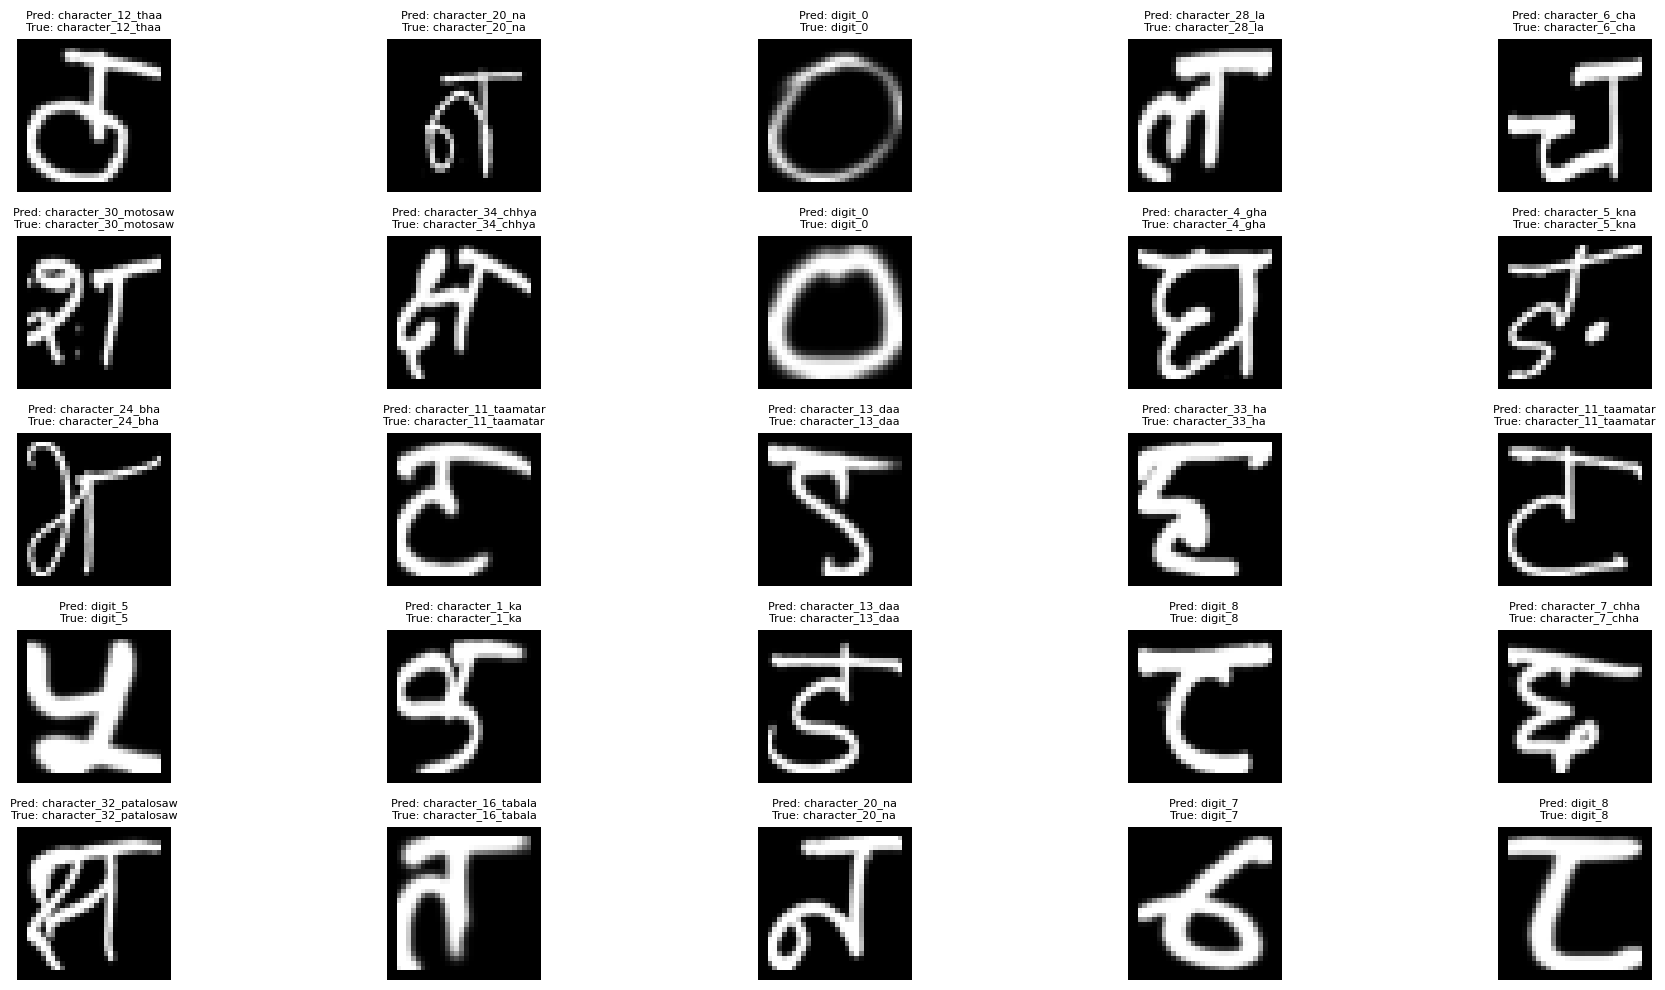

In [18]:

num_images = 25  

label_map_rev = {v: k for k, v in label_map.items()}
predictions = model.predict(X_val[:num_images])
predicted_classes = predictions.argmax(axis=1)
true_classes = y_val[:num_images].argmax(axis=1)


plt.figure(figsize=(20, 10))
for i in range(num_images):
    plt.subplot(5, 5, i + 1)  
    plt.imshow(X_val[i].reshape(32, 32), cmap='gray')  

    plt.title(f"Pred: {label_map_rev[predicted_classes[i]]}\nTrue: {label_map_rev[true_classes[i]]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [22]:
print("Assignment 1 Completed \nBy Arpit Shivhare ")

Assignment 1 Completed 
By Arpit Shivhare 
